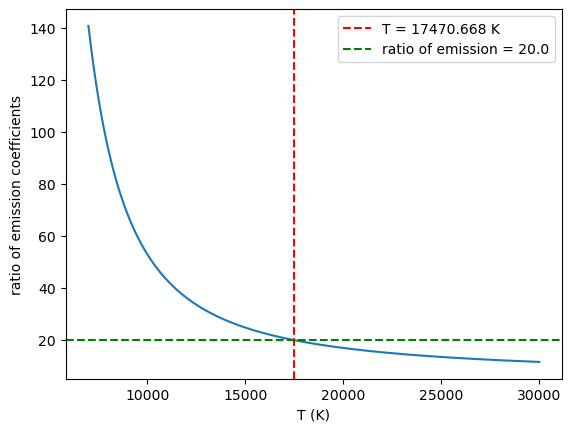

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

# create list to store y values (in this case ratio of emission coefficients)
ylist = []

# create x array (in this case Temperature) from 7000 to 30000
x = np.linspace(7000,30000,1000000)

# for each x, populate y list using equation 5.7 in textbook
for i in range(0,x.shape[0]):
    y = 5.44 * np.exp(2.28*10**4 /x[i]) / (1 + 3.5 * 10**-4 * 1.16*10**3 /x[i]**(1/2))
    ylist.append(y)
    
# find where y is closest to 20 in y list
condition = np.where(20== np.round(ylist,3))[0][0]

# graph and show solution
plt.plot(x,ylist)
plt.axvline(x=x[condition],linestyle='--',color='r',label='T = {} K'.format(np.round(x[condition],3)))
plt.axhline(y=20,linestyle='--',color='g',label='ratio of emission = {}'.format(np.round(ylist[condition],3)))
plt.xlabel('T (K)')
plt.ylabel('ratio of emission coefficients')
plt.legend()
plt.show()

In [6]:
from sunpy import read_genx

ImportError: cannot import name 'read_genx' from 'sunpy' (/opt/anaconda3/lib/python3.8/site-packages/sunpy/__init__.py)

In [8]:
import sunpy

In [9]:
def read_genx(filename):
    """
    solarsoft genx file reader.

    genx files have been used to store calibration data for multiple
    instruments and distributed within solarsoft. They are stored in XDR
    format; The External Data Representation Standard file format (XDR) is
    described in `RFC 1014 <https://tools.ietf.org/html/rfc1014>`__,
    written by Sun Microsystems, Inc. June 1987.

    SolarSoft genx writer creates structures to store the values together with
    the variable names. It use the ``size`` IDL function to include the data
    type, dimension and number of elements that each variable contains.

    Parameters
    ----------
    filename : `str`
        The genx file to be read

    Returns
    -------
    output : `~collections.OrderedDict`
        A dictionary with possibly nested dictionaries with the data in
        the genx file.

    Notes
    -----
    The reader aims to maintain the shape and type of the arrays, but take care with the
    difference in indexing between Python and IDL (row mayor vs column mayor).

    Regarding the type notice that single numbers are converted to python precision, therefore
    a single integer is converted from 16 to 32/64 bits, and a float from 32 to 64.

    **Strings** read from genx files are assumed to be UTF-8.
    """
    with open(filename, mode='rb') as xdrfile:
        xdrdata = SSWUnpacker(xdrfile.read())

    # HEADER information
    version, xdr = xdrdata.unpack_int(), xdrdata.unpack_int()
    creation = xdrdata.unpack_string()
    if version == 2:
        arch = xdrdata.unpack_string()
        os = xdrdata.unpack_string()
        release = xdrdata.unpack_string()
    text = xdrdata.unpack_string()

    # TODO: I don't think will have dim>1 but need
    # to check, if it's larger like savegen has run
    # with a multidimensional structure, then
    # probably the read_struct_skeleton will have to
    # run as in multi-dim structure.

    dim = xdrdata.unpack_int()
    # [1, 8, 1] = Main structure for the data
    arr_size = xdrdata.unpack_farray(dim + 2, xdrdata.unpack_int)
    # the number of upper level strs
    # This is used somehow
    mainsize = arr_size[2]  # NOQA

    skeleton = read_struct_skeleton(xdrdata)
    struct_to_data(xdrdata, skeleton)
    xdrdata.done()
    skeleton['HEADER'] = OrderedDict([('VERSION', version), ('XDR', xdr), ('CREATION', creation)])
    if version == 2:
        skeleton['HEADER']['IDL_VERSION'] = OrderedDict([('ARCH', arch),
                                                         ('OS', os),
                                                         ('RELEASE', release)])
    skeleton['HEADER']['TEXT'] = text
    # TODO: for python >= 3.2; so we can keep the original order as how it's stored in the file
    # skeleton.move_to_end('HEADER', last=False)
    return skeleton

In [10]:
read_genx('/Users/crura/SSW/packages/forward/idl/LOSINPUTS,GRIDINPUTS,LOSPRAMSSTRUCT,OBSPRAMSSTRUCT.genx')

NameError: name 'SSWUnpacker' is not defined

In [11]:
x_lengthrsun = 9
y_lengthrsun = 9
x_lengthpixels = 256
y_lengthpiels = 256

